## A Simple Classification

* Demonstrate the use of classification methods for fruits

### Example - Fruits Type

We've acquired a fruit type data. The file contains the mass, height, and width of a selection of oranges, lemons and apples. The heights were measured along the core of the fruit. The widths were the widest width perpendicular to the height.



**import the modules and load data file**

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

fruits = pd.read_csv('fruit_data_with_colors.txt', sep='\t')
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


**Code: Create Mapping from Fruit Labels**

In [2]:
lookup_fruit_name = dict(zip(fruits.fruit_label.unique(), fruits.fruit_name.unique()))   
lookup_fruit_name

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

**Code: Explore the Data**

<IPython.core.display.Javascript object>


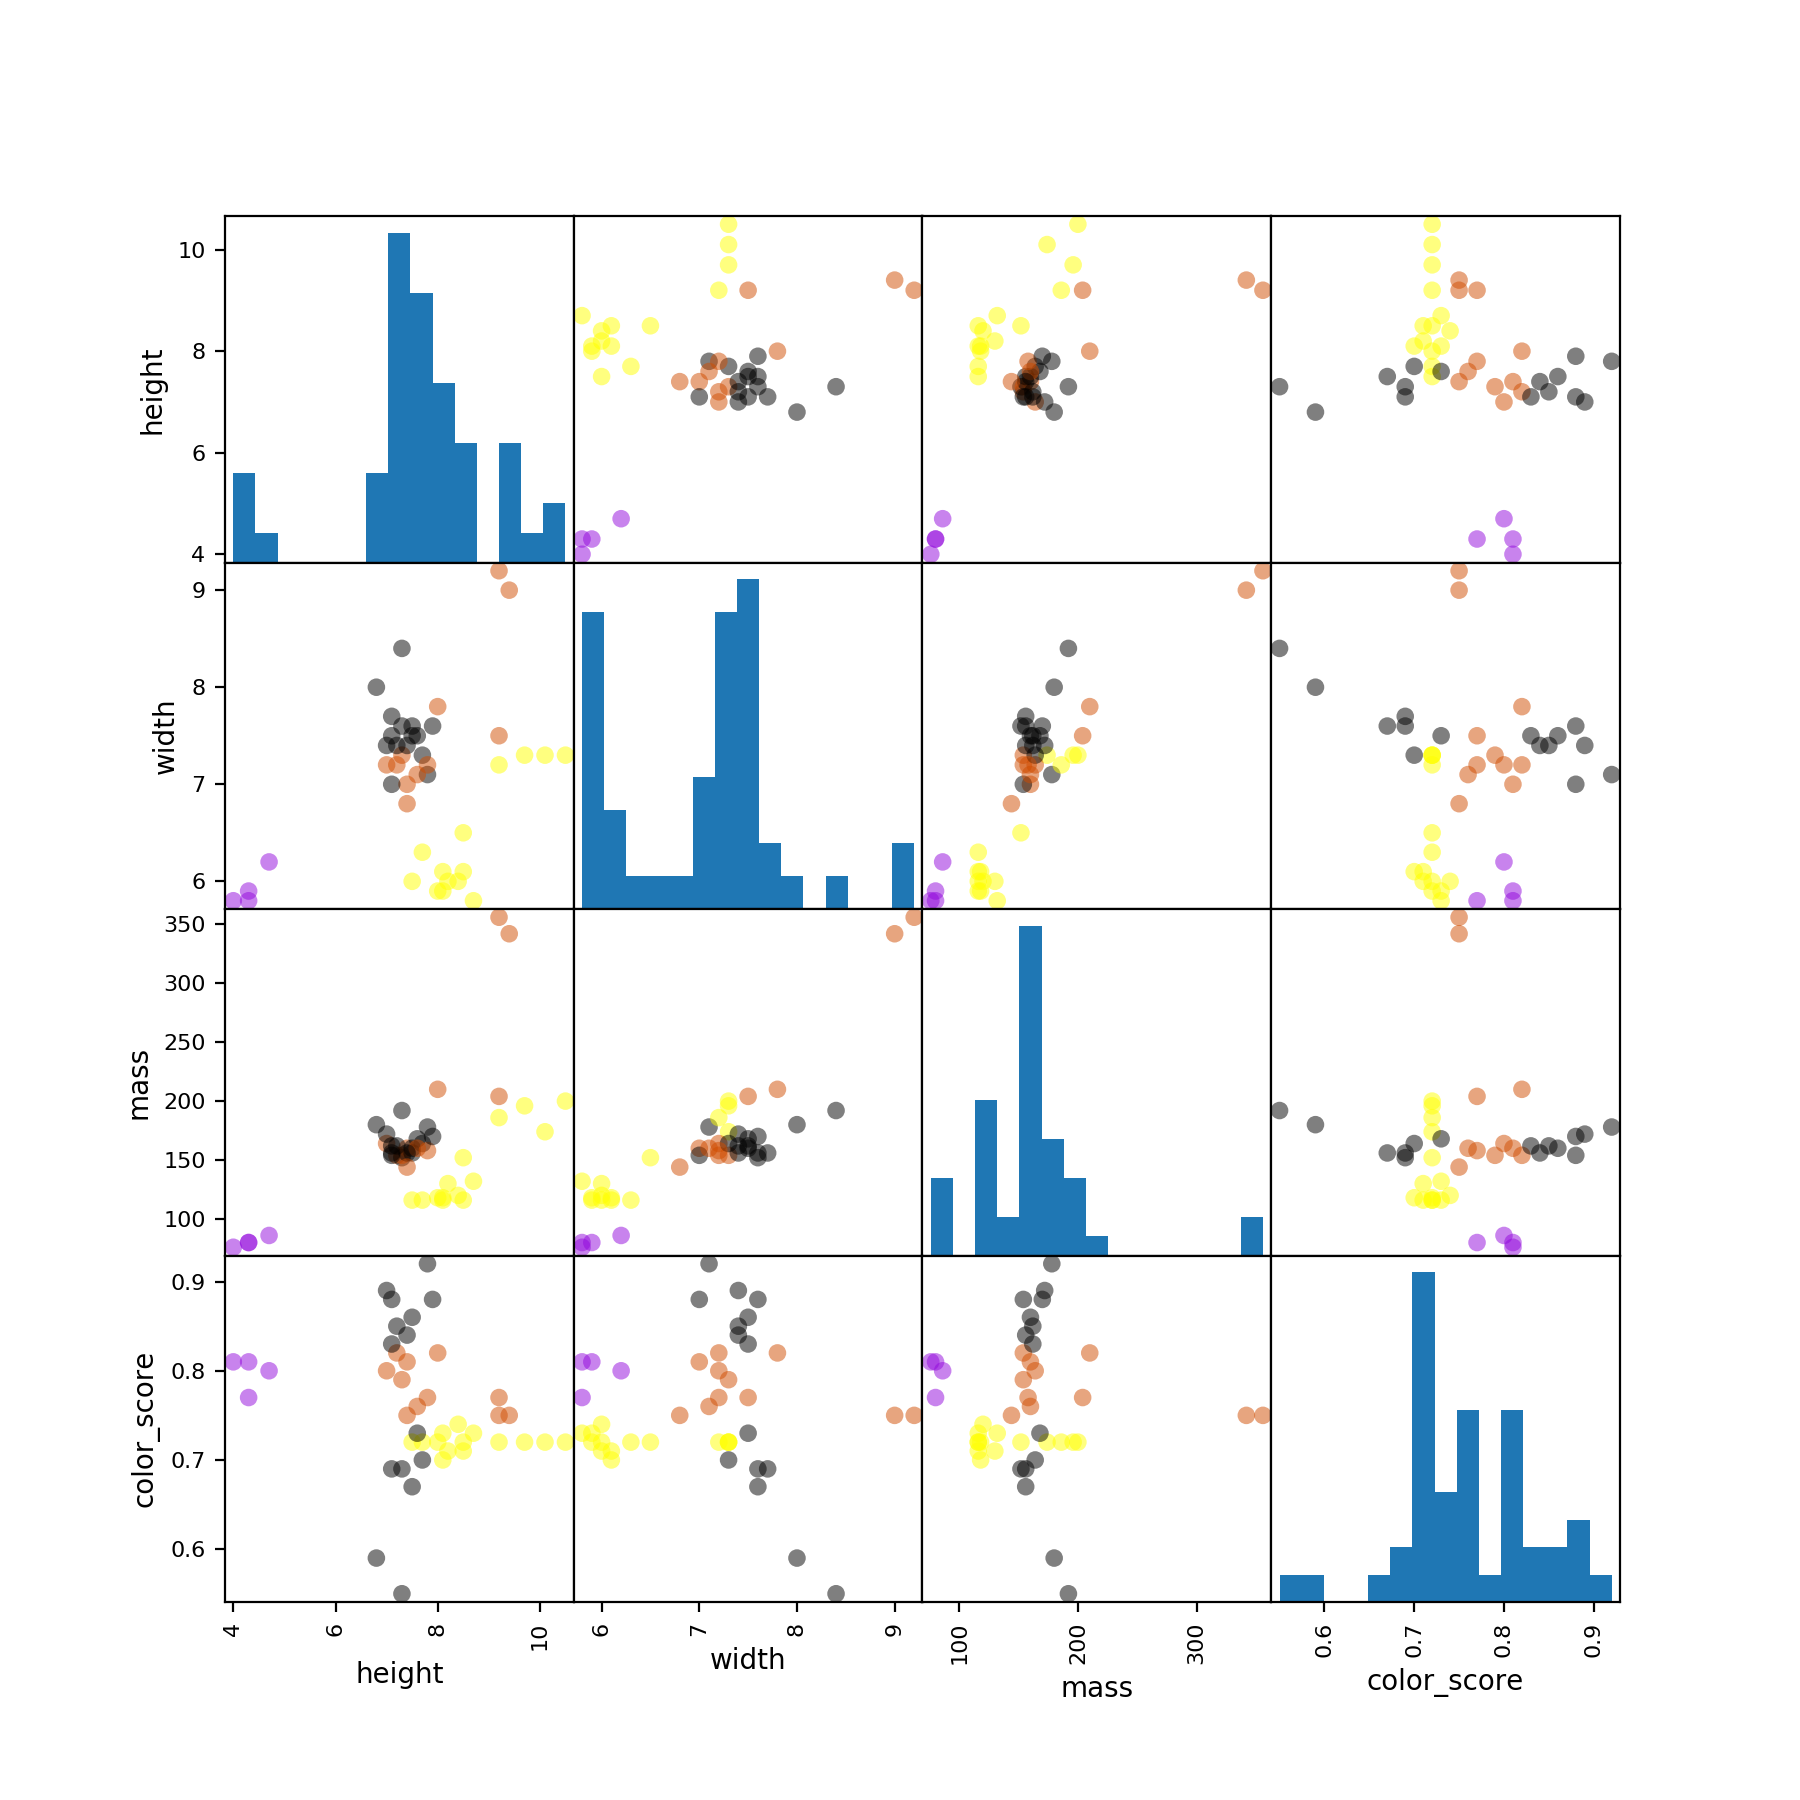

In [3]:
# plotting a scatter matrix
from matplotlib import cm
from pandas.plotting import scatter_matrix

X = fruits[['height', 'width', 'mass', 'color_score']]
y = fruits['fruit_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(X_train, c= y_train, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap=cmap)

<IPython.core.display.Javascript object>


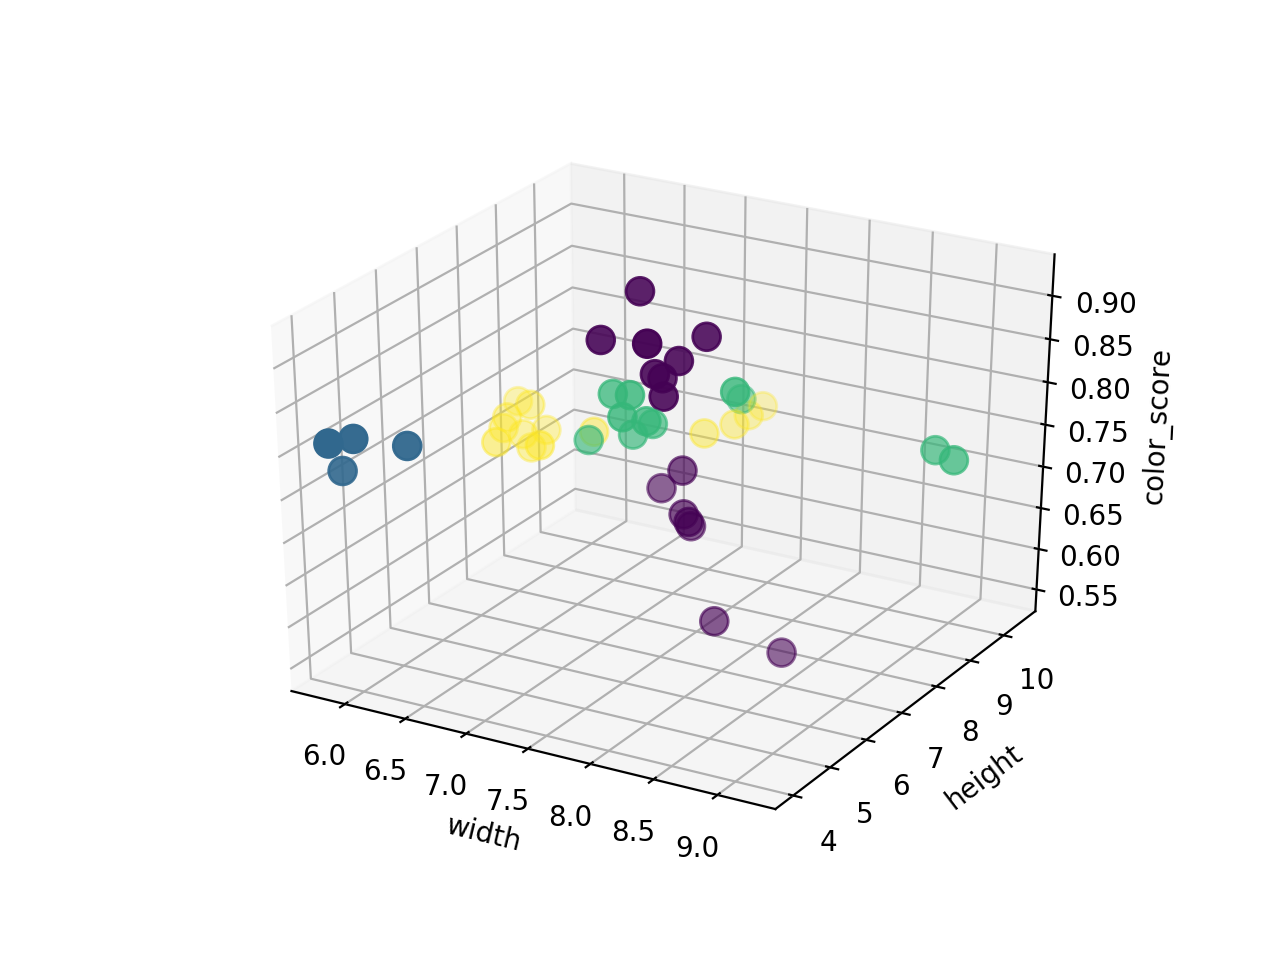

In [4]:
# plotting a 3D scatter plot
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X_train['width'], X_train['height'], X_train['color_score'], c = y_train, marker = 'o', s=100)
ax.set_xlabel('width')
ax.set_ylabel('height')
ax.set_zlabel('color_score')
plt.show()

### Create the classification model

For this example, we use the mass, width, and height features of each fruit instance

$$
\mbox{fruit_label} = \displaystyle \mathbf{f} \left([\mbox{mass}, \mbox{height}, \mbox{width}]\right)
$$

**Alternatively** 

A real-valued probability measure the likelihood $\mathbf{p}_{\theta} (\mathbf{y}_i | \mathbf{X})$

$$
\mathbf{p}_{\theta} \left(\mbox{fruit_label}\right) = \displaystyle f \left([\mbox{mass}, \mbox{height}, \mbox{width}]\right)
$$

**Code: Extract the Feature & Label Data**

In [5]:
X = fruits[['mass', 'width', 'height']]
y = fruits['fruit_label']

**Code: using the Classifier Algorithm - K-NN**

In [6]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)

knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

**Code: Plot the decision boundaries for Fruit Classifier**

In [7]:
from adspy_shared_utilities import plot_fruit_knn

plot_fruit_knn(X, y, 5, 'uniform')   # we choose 5 nearest neighbors

ModuleNotFoundError: No module named 'graphviz'